In [1]:
import numpy as np #mengimport modul numpy dan menggunakan alias np untuk operasi numerik dan array
import matplotlib.pyplot as plt #mengimport modul matplotlib.pyplot untuk plotting
%matplotlib inline 
import cv2 #mengimport modul cv2
import matplotlib.image as mpimg #mengimport modul matplotlib.image
from skimage import data #mengimport modul data dari paket skimage untuk mengakses dataset citra

In [2]:
image = data.camera() #mengambil citra kamera bawaan dari library skimage yang disebut "camera"
image_equalized = cv2.equalizeHist(image) #melakukan ekualisasi histogram pada citra image

clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)) #membuat objek CLAHE (Contrast Limited Adaptive Histogram Equalization) 

image_clahe = clahe.apply(image) #menerapkan CLAHE pada citra image

In [3]:
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8') #membuat aray kosong

min = np.min(image) #menghitung nilai minimum 
max = np.max(image) #menghitung nilai maksimum

for i in range(image.shape[0]): #melakukan iterasi untuk setiap piksel dalam citra image
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min) #menghitung nilai piksel baru dalam citra hasil kontras stretching 

In [4]:
copyCamera = image.copy().astype(float) #membuat salinan citra image dengan tipe data float

m1,n1 = copyCamera.shape #mengambil ukuran citra copyCamera
output1 = np.empty([m1, n1]) #membuat array kosong output1 dengan ukuran yang sama

for baris in range(0, m1-1): #melakukan iterasi untuk setiap piksel dalam citra copyCamera
    for kolom in range(0, n1-1):
        a1 = baris #menyimpan indeks baris saat ini dalam variabel a1
        b1 = kolom #menyimpan indeks kolom saat ini dalam variabel b1
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9 #menghitung nilai piksel baru dalam citra hasil perkalian konstanta (output1

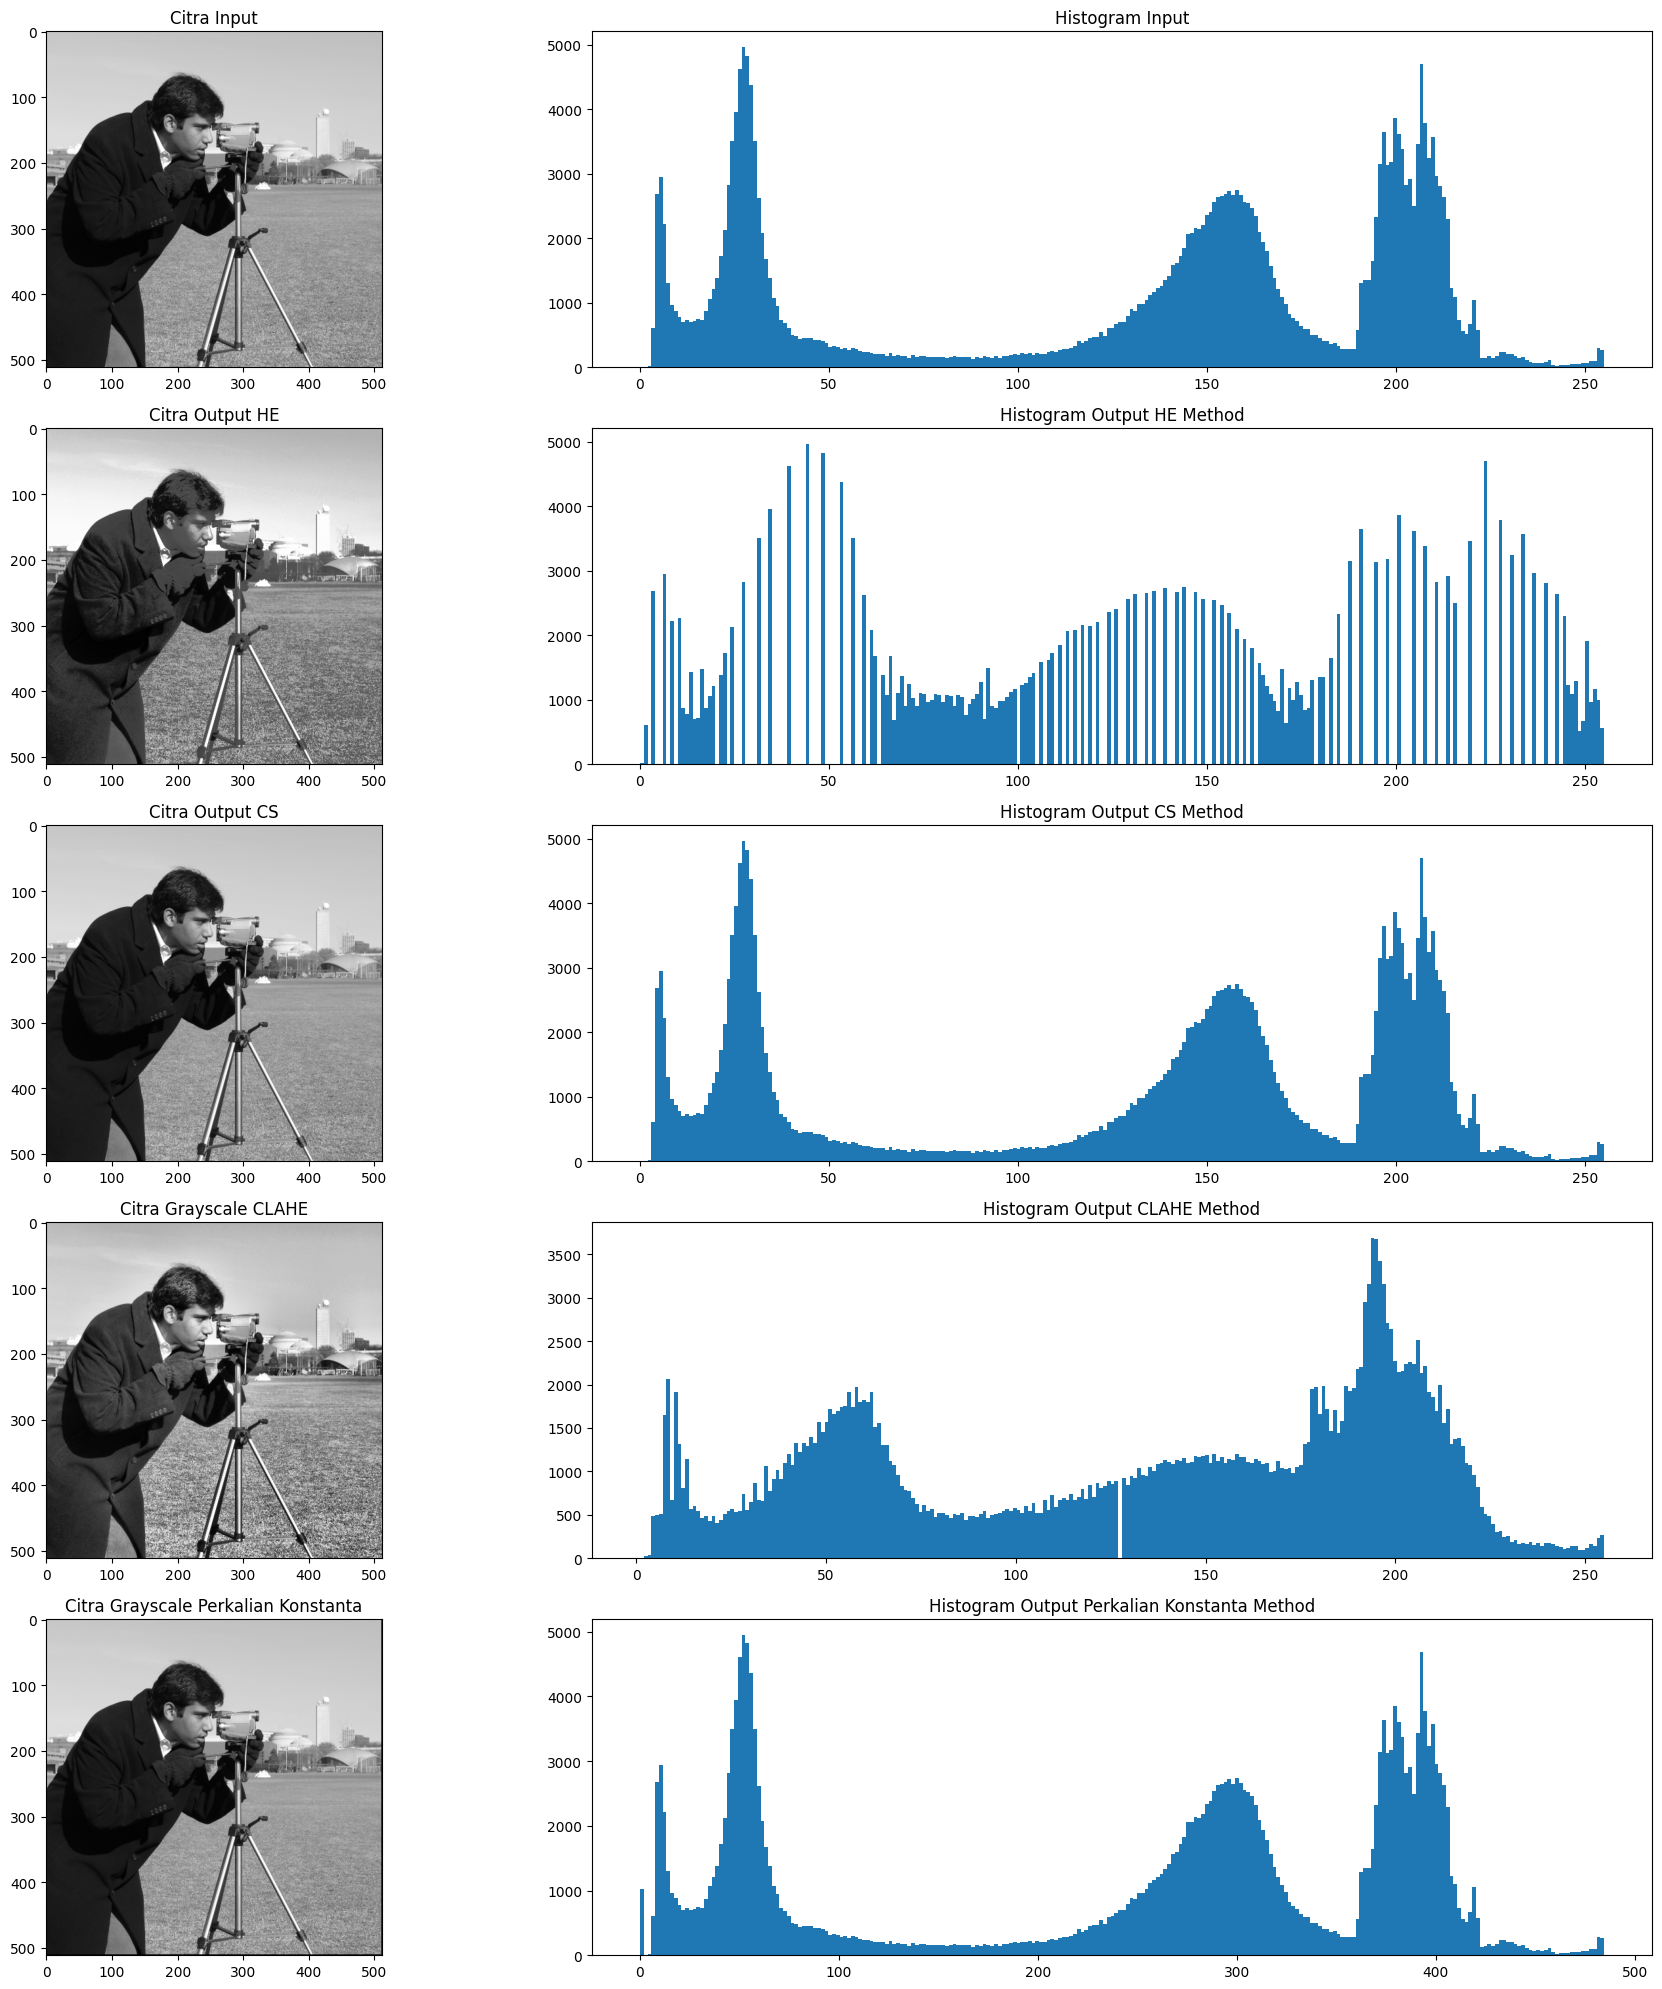

In [5]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20)) #membuat objek gambar dengan ukuran 5x2 dan Ukuran total gambar akan memiliki lebar 20 dan tinggi 20
ax = axes.ravel() #melakukan perataan (flattening) pada array axes untuk menghasilkan array satu dimensi ax

ax[0].imshow(image, cmap=plt.cm.gray) #menampilkan citra image
ax[0].set_title("Citra Input") #memberi judul gambar 
ax[1].hist(image.ravel(), bins=256) #menampilkan histogram dari citra image
ax[1].set_title('Histogram Input') #memberi judul gambar 

ax[2].imshow(image_equalized, cmap=plt.cm.gray) #menampilkan citra image equalized
ax[2].set_title("Citra Output HE") #memberi judul gambar 
ax[3].hist(image_equalized.ravel(), bins=256) #menampilkan histogram dari citra image_equalized
ax[3].set_title('Histogram Output HE Method') #memberi judul gambar 

ax[4].imshow(image_cs, cmap=plt.cm.gray) #menampilkan citra image cs
ax[4].set_title("Citra Output CS") #memberi judul gambar 
ax[5].hist(image_cs.ravel(), bins=256) #menampilkan histogram dari citra image_cs
ax[5].set_title('Histogram Output CS Method')#memberi judul gambar 

ax[6].imshow(image_clahe, cmap=plt.cm.gray) #menampilkan citra image chale
ax[6].set_title("Citra Grayscale CLAHE") #memberi judul gambar 
ax[7].hist(image_clahe.ravel(), bins=256) #menampilkan histogram dari citra image_chale
ax[7].set_title('Histogram Output CLAHE Method') #memberi judul gambar 

ax[8].imshow(output1, cmap=plt.cm.gray) #menampilkan citra output1
ax[8].set_title("Citra Grayscale Perkalian Konstanta") #memberi judul gambar 
ax[9].hist(output1.ravel(), bins=256) #menampilkan histogram dari citra output1
ax[9].set_title('Histogram Output Perkalian Konstanta Method') #memberi judul gambar 

fig.tight_layout() #mengoptimalkan tata letak (layout) dari gambar-gambar yang ditampilkan dalam satu figure secara otomatis